In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# 경고무시
import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Study/파이썬 머신러닝 완벽가이드/data/titanic_train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,Young Adult


In [3]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Lundahl, Mr. Johan Svensson",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
E101           3
F2             3
              ..
B37            1
C99            1
A14            1
D21            1
D15            1
Name: Cabin, Length: 147, dtype: int64

# 결측치 채우기

- Age의 경우 평균 값을 대체
- Embarked의 경우 최빈 값인 S로 대체
- Cabin의 경우 결측치를 의미하는 N으로 대체


In [11]:
df['Age'].fillna(df['Age'].mean(), inplace = True)
df['Embarked'].fillna('S', inplace = True)
df['Cabin'].fillna('N', inplace = True)

print('* 결측치의 개수 *')
df.isna().sum()

* 결측치의 개수 *


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# EDA

## Cabin

Cabin의 경우 선실 등급을 의미하는 첫번째 글자가 중요

In [12]:
df['Cabin'] = df['Cabin'].str[:1]
df['Cabin'].head()

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object

## Sex

여성의 경우 생존율이 더 높다는 것을 알 수 있음

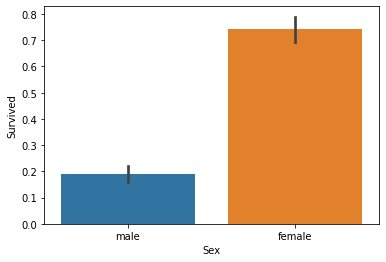

In [14]:
sns.barplot(x='Sex', y='Survived', data=df)

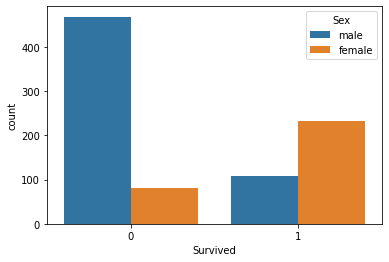

In [15]:
sns.countplot(x='Survived', hue='Sex', data=df)

## Pclass

모든 객실 등급에서 여성의 생존율이 높다는 것을 알 수 있음 

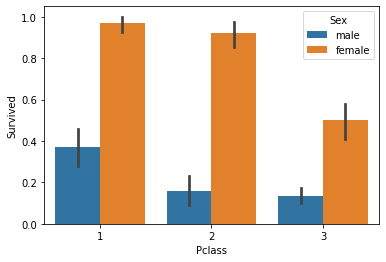

In [16]:
sns.barplot(x='Pclass', y= 'Survived', hue='Sex', data=df)

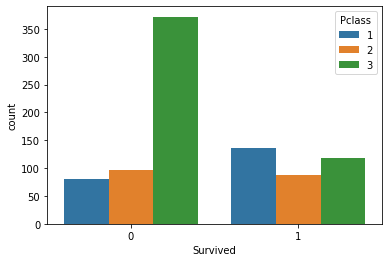

In [19]:
sns.countplot(x='Survived', hue='Pclass', data=df)

# 데이터 전처리

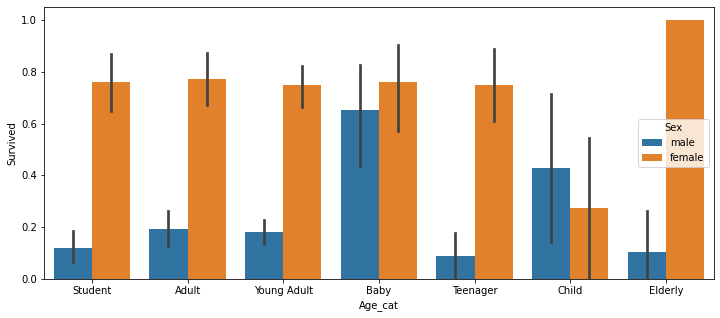

In [24]:
def get_category(age):
  cat = ''
  if age <= -1: cat = 'Unknown'
  elif age <= 5: cat = 'Baby'
  elif age <= 12: cat = 'Child'
  elif age <= 18: cat = 'Teenager'
  elif age <= 25: cat = 'Student'
  elif age <= 35: cat = 'Young Adult'
  elif age <= 60: cat = 'Adult'
  else: cat = 'Elderly'

  return cat

df['Age_cat'] = df['Age'].apply(lambda x : get_category(x))

plt.figure(figsize=(12,5))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=df)

나이가 많아질 수록 여성의 생존 비율이 높아진다는 것을 알 수 있음

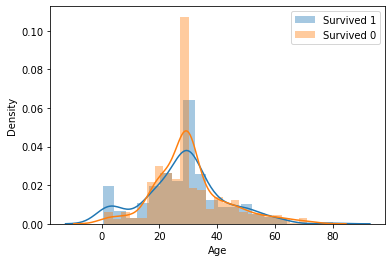

In [32]:
sns.distplot(df[df['Survived'] == 1]['Age'], label='Survived 1')
sns.distplot(df[df['Survived'] == 0]['Age'], label='Survived 0')
plt.legend()

나이가 어릴 수록 상대적으로 생존율이 높음

In [33]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_cat'],
      dtype='object')

In [36]:
from sklearn.preprocessing import LabelEncoder

# 결측치 채우기
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace = True)
  df['Embarked'].fillna('S', inplace = True)
  df['Cabin'].fillna('N', inplace = True)

  return df

# 불필요한 속성 제거
def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
  return df

# 레이블 인코딩 수행
def format_features(df):
  cols = ['Sex', 'Cabin', 'Embarked', 'Age_cat']
  for col in cols:
    le = LabelEncoder()
    le = le.fit(df[col])
    df[col] = le.transform(df[col])
  
  return df

# 전체 전처리 함수
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,Young Adult


In [39]:
target = df['Survived']
features = df.drop('Survived', axis=1)
features = transform_features(features)

In [47]:
features.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked',
       'Age_cat'],
      dtype='object')

# 모델

In [54]:
# 검증 데이터
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# 모델 생성
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# 모델 성능 측정
from sklearn.metrics import accuracy_score

# 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

In [41]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state = 11, shuffle = True)

In [46]:
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression(random_state = 11)

dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
print('DecisionTreeClassifier 정확도: {:.4f}'.format(accuracy_score(y_test, dt_pred)))

rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)
print('RandomForestClassifier 정확도: {:.4f}'.format(accuracy_score(y_test, rf_pred)))

lr_clf.fit(x_train, y_train)
lr_pred = lr_clf.predict(x_test)
print('LogisticRegression     정확도: {:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.8045
RandomForestClassifier 정확도: 0.8603
LogisticRegression     정확도: 0.8659


[Text(0.5, 1.0, 'LogisticRegression')]

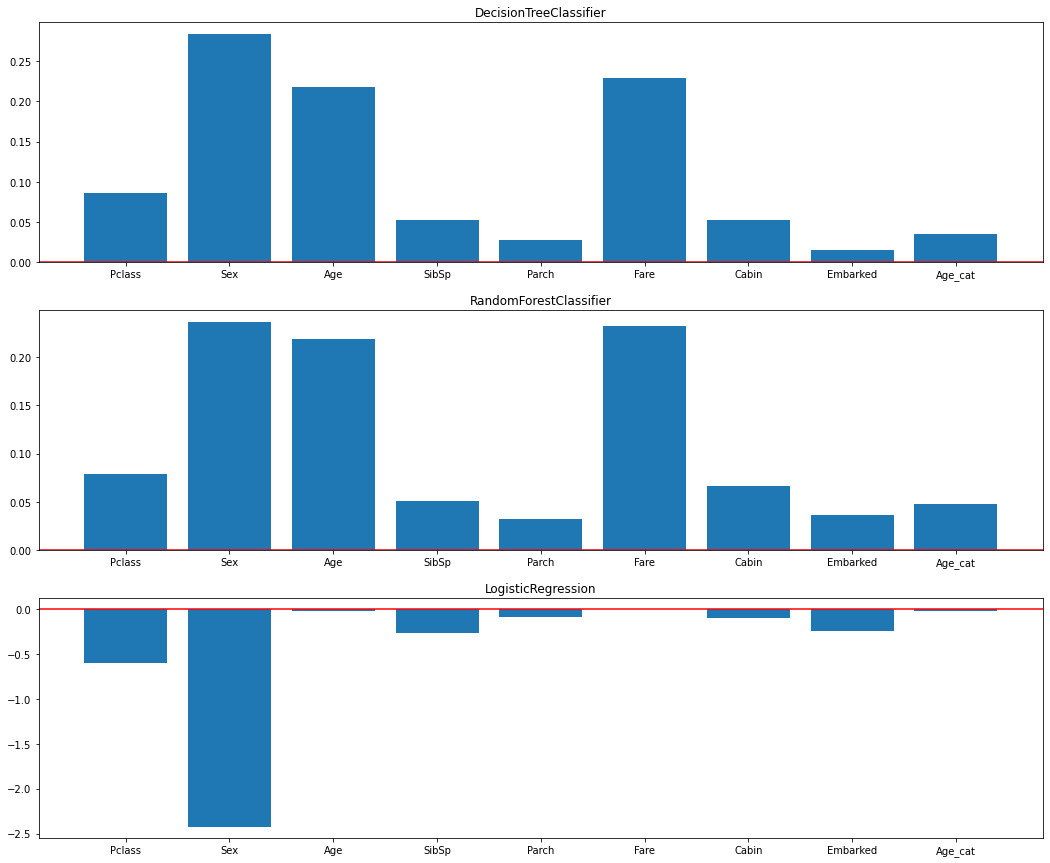

In [50]:
# 모델별 중요 픽쳐
figure, ax = plt.subplots(nrows=3, ncols=1)

figure.set_size_inches(18,15)
ax[0].bar(x=features.columns, height=dt_clf.feature_importances_)
ax[0].axhline(y=0, color='r', linestyle='-')
ax[0].set(title="DecisionTreeClassifier")

ax[1].bar(x=features.columns, height=rf_clf.feature_importances_)
ax[1].axhline(y=0, color='r', linestyle='-')
ax[1].set(title="RandomForestClassifier")

ax[2].bar(x=features.columns, height=lr_clf.coef_.reshape(-1))
ax[2].axhline(y=0, color='r', linestyle='-')
ax[2].set(title="LogisticRegression")

In [52]:
from tqdm import tqdm_notebook

dt_oof = np.zeros_like(target)
tf_oof = np.zeros_like(target)
lr_oof = np.zeros_like(target)

skf = StratifiedKFold(n_splits=5, random_state=11)

for idx, (trn_idx, val_idx) in tqdm_notebook(enumerate(skf.split(features, target))) :
    x_train, y_train = features.iloc[trn_idx], target[trn_idx]
    x_test, y_test = features.iloc[val_idx], target[val_idx]

    # DecisionTreeClassifier
    dt_clf = DecisionTreeClassifier(random_state = 11)
    dt_clf.fit(x_train, y_train)
    dt_pred = dt_clf.predict(x_test)
    dt_oof[val_idx] = dt_pred

    # RandomForestClassifier
    rf_clf = RandomForestClassifier(random_state = 11)
    rf_clf.fit(x_train, y_train)
    rf_pred = rf_clf.predict(x_test)
    tf_oof[val_idx] = rf_pred

    # LogisticRegression
    lr_clf = LogisticRegression(random_state = 11)
    lr_clf.fit(x_train, y_train)
    lr_pred = lr_clf.predict(x_test)
    lr_oof[val_idx] = lr_pred
    
    print('--------------------------------------{}번째----------------------------------'.format(idx+1))
    print('DecisionTreeClassifier 정확도: {:.4f}'.format(accuracy_score(y_test, dt_pred)))
    print('RandomForestClassifier 정확도: {:.4f}'.format(accuracy_score(y_test, rf_pred)))
    print('LogisticRegression     정확도: {:.4f}'.format(accuracy_score(y_test, lr_pred)))
    print()

print('--------------------------------------전체----------------------------------')
print('DecisionTreeClassifier 정확도: {:.4f}'.format(accuracy_score(target, dt_oof)))
print('RandomForestClassifier 정확도: {:.4f}'.format(accuracy_score(target, tf_oof)))
print('LogisticRegression     정확도: {:.4f}'.format(accuracy_score(target, lr_oof)))

--------------------------------------1번째----------------------------------
DecisionTreeClassifier 정확도: 0.7654
RandomForestClassifier 정확도: 0.7933
LogisticRegression     정확도: 0.8045

--------------------------------------2번째----------------------------------
DecisionTreeClassifier 정확도: 0.7584
RandomForestClassifier 정확도: 0.7978
LogisticRegression     정확도: 0.7640

--------------------------------------3번째----------------------------------
DecisionTreeClassifier 정확도: 0.8090
RandomForestClassifier 정확도: 0.8371
LogisticRegression     정확도: 0.7809

--------------------------------------4번째----------------------------------
DecisionTreeClassifier 정확도: 0.7921
RandomForestClassifier 정확도: 0.7528
LogisticRegression     정확도: 0.7865

--------------------------------------5번째----------------------------------
DecisionTreeClassifier 정확도: 0.8202
RandomForestClassifier 정확도: 0.8596
LogisticRegression     정확도: 0.8034


--------------------------------------전체----------------------------------
DecisionTreeCl

# 튜닝 전

In [57]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state = 11, shuffle = True)

dt_clf = DecisionTreeClassifier(random_state = 11)

dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
print('DecisionTreeClassifier 정확도: {:.4f}'.format(accuracy_score(y_test, dt_pred)))

DecisionTreeClassifier 정확도: 0.8045


# 튜닝 후

In [56]:
# 하이퍼 파라미터 튜닝

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state = 11, shuffle = True)

dt_clf = DecisionTreeClassifier(random_state=22)

params = {'max_depth':[2, 3, 5, 10],
          'min_samples_split':[2, 3, 5],
          'min_samples_leaf':[1, 5, 8]}

grid_dt = GridSearchCV(dt_clf, param_grid=params, cv=5, scoring='accuracy')

grid_dt.fit(x_train, y_train)

print('최적의 파라미터: ', grid_dt.best_params_)
print('최고의 정확도: ', grid_dt.best_score_)

# 최적의 파라미터로 학습
estimator = grid_dt.best_estimator_

pred = estimator.predict(x_test)
print('정확도: ', accuracy_score(y_test, pred))

최적의 파라미터:  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
최고의 정확도:  0.7991825076332119
정확도:  0.8715083798882681
